In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")


In [29]:
# Load the unemployment data
unemployment_df = pd.read_csv("Unemployment in India.csv")

# Load the state coordinates data
coordinates_df = pd.read_csv('state_coordinates.csv')

# Display the first few rows of each DataFrame
print('Unemployment Data:')
display(unemployment_df.head())

print("\nState Coordinates Data:")
display(coordinates_df.head())

Unemployment Data:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural



State Coordinates Data:


,Region,latitude,longitude
0,Andhra Pradesh,15.9129,79.7400
1,Arunachal Pradesh,28.2180,94.7278
2,Assam,26.2006,92.9376
3,Bihar,25.0961,85.3131
4,Chhattisgarh,21.2787,81.8661


In [30]:
# Clean column names
unemployment_df.columns = unemployment_df.columns.str.strip()

# Check basic info
print(unemployment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [31]:
# Convert Date to datetime
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

# Extract Year and Month
unemployment_df['Year'] = unemployment_df['Date'].dt.year
unemployment_df['Month'] = unemployment_df['Date'].dt.month

In [32]:
# Drop rows with any missing values
unemployment_df.dropna(inplace=True)

# Filter only "Combined" area
combined_df = unemployment_df[unemployment_df['Area'].str.lower() == 'combined']


# Estimated Unemployment rate(%)


In [33]:
# Summary Statistics
print("Summary of Estimated Unemployment Rate (%):")
print(combined_df['Estimated Unemployment Rate (%)'].describe())


Summary of Estimated Unemployment Rate (%):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Estimated Unemployment Rate (%), dtype: float64


In [34]:
unemployment_df['Area'].unique()


array(['Rural', 'Urban'], dtype=object)

In [35]:
# Region-wise average unemployment (Rural + Urban combined)
region_avg = unemployment_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

print("\n Top 10 Regions by Avg Unemployment Rate (%):")
print(region_avg.head(10))

print("\n Bottom 10 Regions by Avg Unemployment Rate (%):")
print(region_avg.tail(10))



 Top 10 Regions by Avg Unemployment Rate (%):
Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Name: Estimated Unemployment Rate (%), dtype: float64

 Bottom 10 Regions by Avg Unemployment Rate (%):
Region
Maharashtra       7.557500
Andhra Pradesh    7.477143
Madhya Pradesh    7.406429
Sikkim            7.249412
Karnataka         6.676071
Gujarat           6.663929
Uttarakhand       6.582963
Assam             6.428077
Odisha            5.657857
Meghalaya         4.798889
Name: Estimated Unemployment Rate (%), dtype: float64


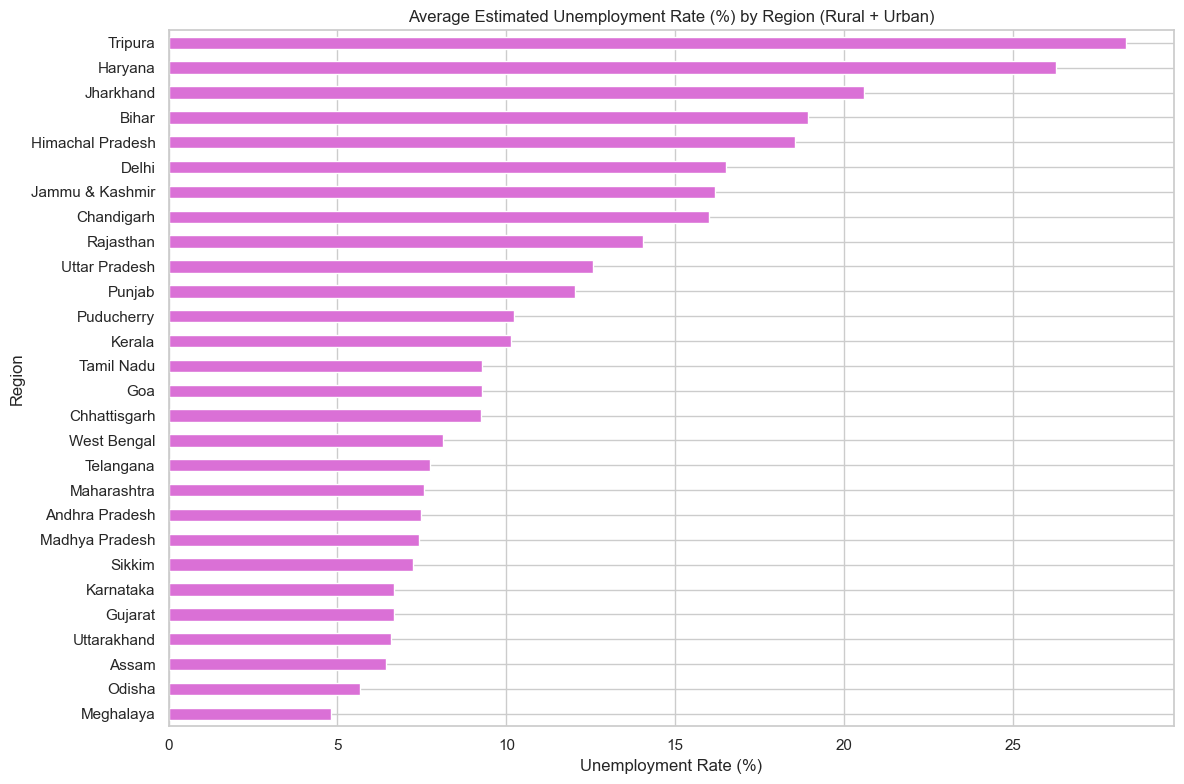

In [36]:
plt.figure(figsize=(12,8))
region_avg.plot(kind='barh', color='orchid')
plt.title("Average Estimated Unemployment Rate (%) by Region (Rural + Urban)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Trend over time (T2)

In [37]:
# Remove unnecessary spaces in column names
unemployment_df.columns = unemployment_df.columns.str.strip()
unemployment_df['Region'] = unemployment_df['Region'].str.strip()

# Convert Date to datetime
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])

# Drop rows with missing values
unemployment_df.dropna(inplace=True)

# Create Year & Month columns
unemployment_df['Year'] = unemployment_df['Date'].dt.year
unemployment_df['Month'] = unemployment_df['Date'].dt.month


In [38]:
# Summary of Unemployment Rate
print("Unemployment Rate Summary:\n")
print(unemployment_df['Estimated Unemployment Rate (%)'].describe())


Unemployment Rate Summary:

count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64


In [39]:
# Region-wise average unemployment
region_avg = unemployment_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

print("\nTop 5 Regions with Highest Avg Unemployment:")
print(region_avg.head(5))

print("\nBottom 5 Regions with Lowest Avg Unemployment:")
print(region_avg.tail(5))



Top 5 Regions with Highest Avg Unemployment:
Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: Estimated Unemployment Rate (%), dtype: float64

Bottom 5 Regions with Lowest Avg Unemployment:
Region
Gujarat        6.663929
Uttarakhand    6.582963
Assam          6.428077
Odisha         5.657857
Meghalaya      4.798889
Name: Estimated Unemployment Rate (%), dtype: float64


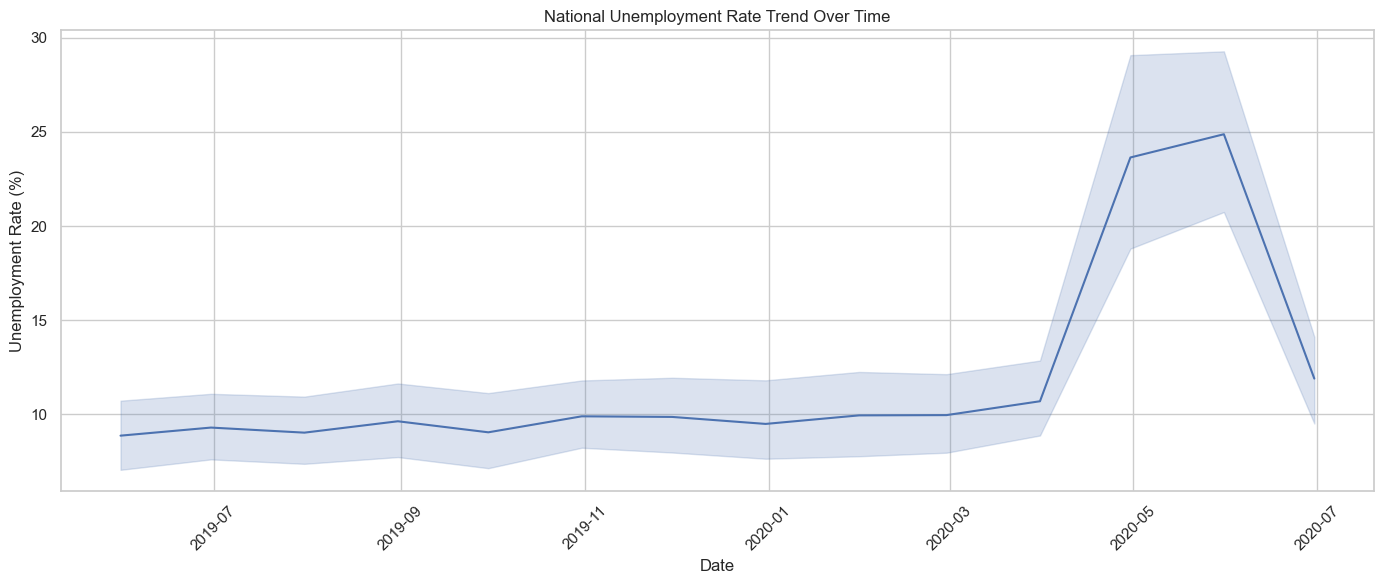

In [40]:
plt.figure(figsize=(14,6))
sns.lineplot(data=unemployment_df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("National Unemployment Rate Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Impact of COVID-19 on Unemployment

In [41]:
#Filter data for the years 2019, 2020
covid_df = unemployment_df[unemployment_df['Year'].isin([2019, 2020, 2021])]

#Checks counts per year
print(covid_df['Year'].value_counts())

Year
2019    430
2020    310
Name: count, dtype: int64


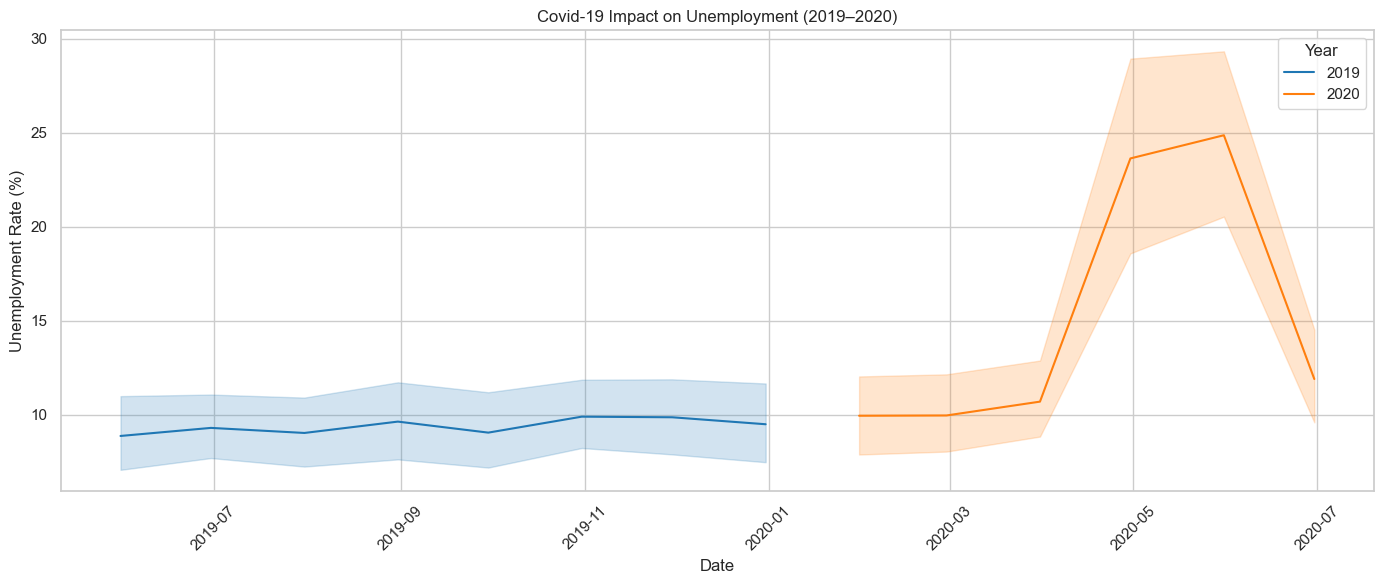

In [42]:
plt.figure(figsize=(14,6))
sns.lineplot(data=covid_df, x='Date', y='Estimated Unemployment Rate (%)', hue='Year', palette='tab10')
plt.title("Covid-19 Impact on Unemployment (2019–2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


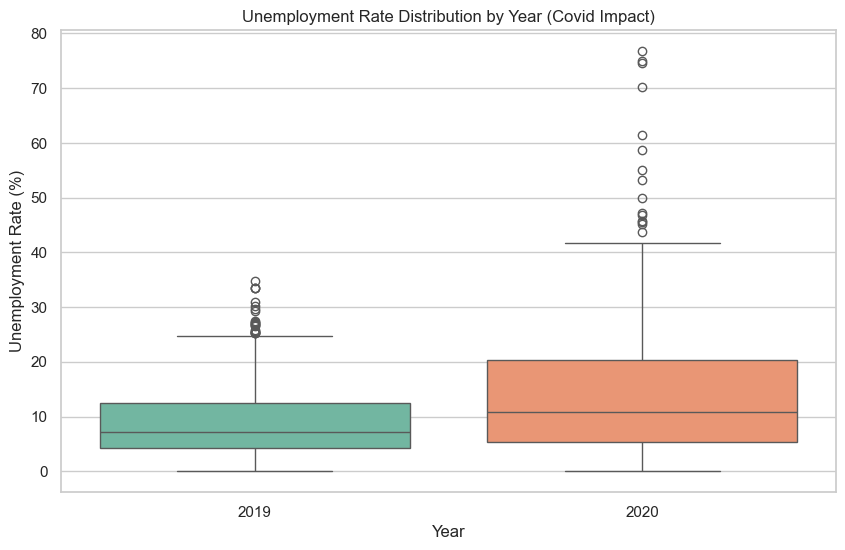

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=covid_df, x='Year', y='Estimated Unemployment Rate (%)', palette='Set2')
plt.title("Unemployment Rate Distribution by Year (Covid Impact)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


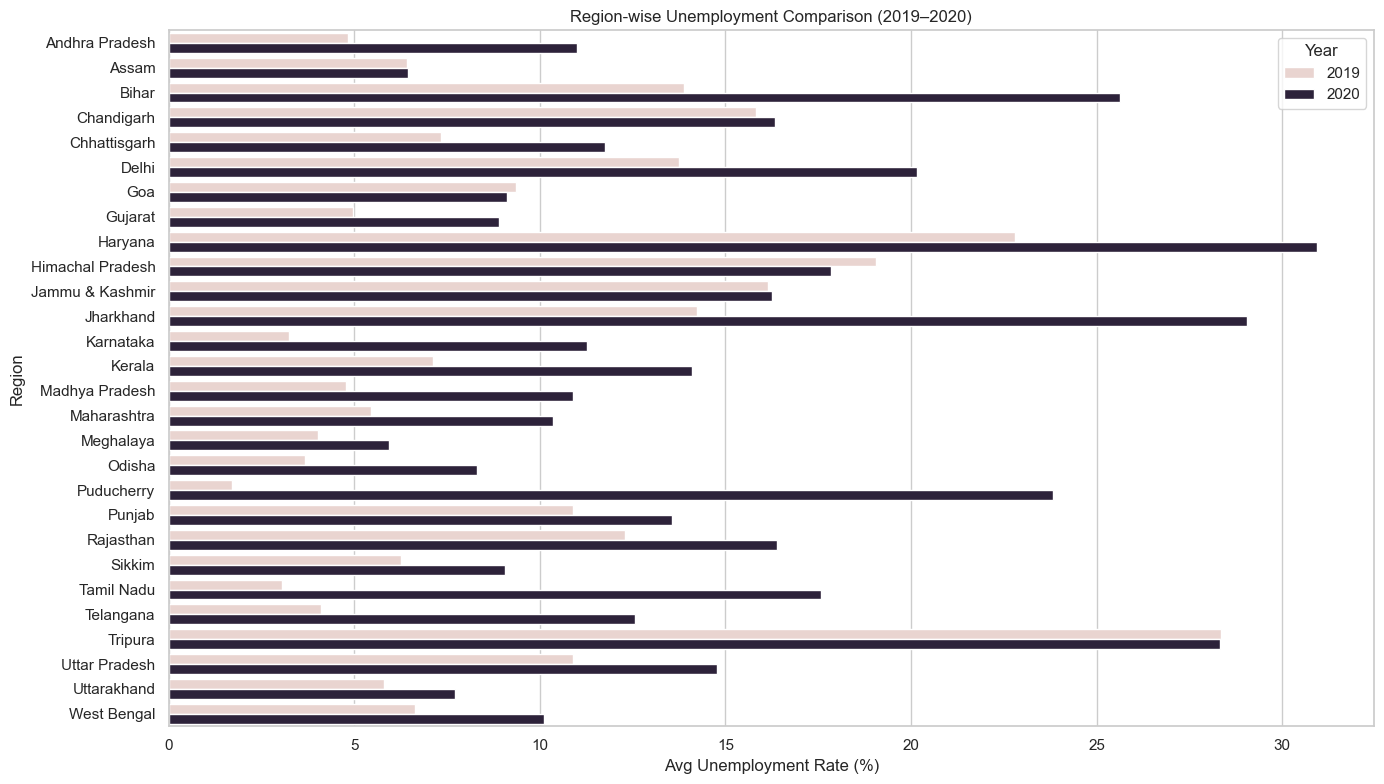

In [44]:
region_year_avg = covid_df.groupby(['Region', 'Year'])['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(14,8))
sns.barplot(data=region_year_avg, x='Estimated Unemployment Rate (%)', y='Region', hue='Year')
plt.title("Region-wise Unemployment Comparison (2019–2020)")
plt.xlabel("Avg Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


# Seasonal Trends in Unemployment(T4)

In [45]:
# Month-wise average unemployment (2019 and 2020 combined)
monthly_avg = unemployment_df.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()
monthly_avg

,Month,Estimated Unemployment Rate (%)
0,1,9.950755
1,2,9.964717
2,3,10.700577
3,4,23.641569
4,5,16.646190
5,6,10.553462
6,7,9.033889
7,8,9.637925
8,9,9.051731
9,10,9.900909


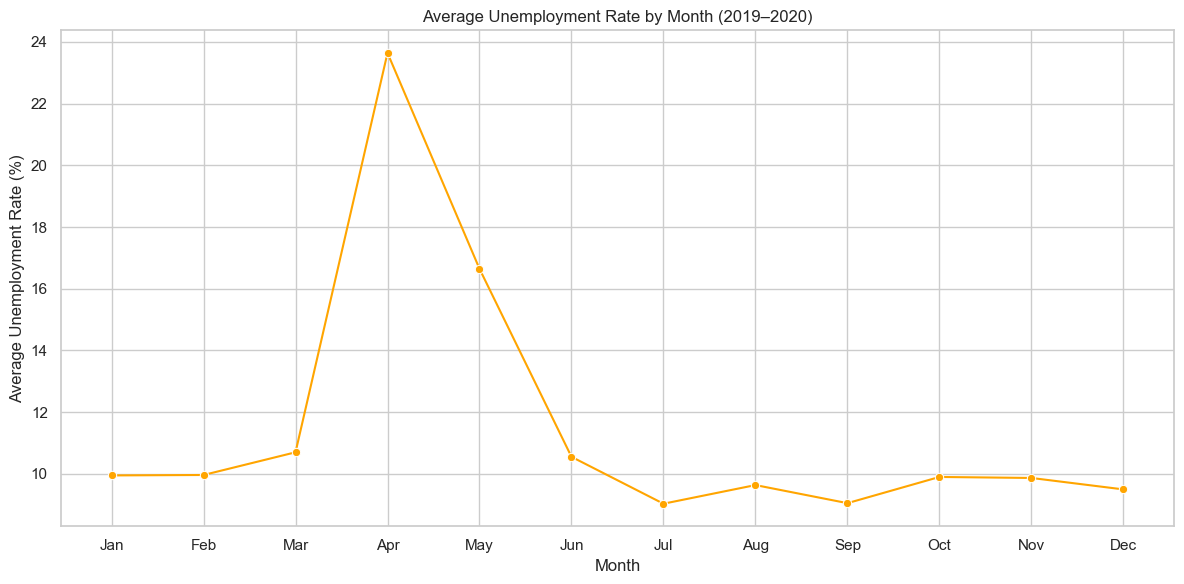

In [46]:
# Month-wise average unemployment (2019 and 2020 combined)
monthly_avg = unemployment_df.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()
monthly_avg

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x='Month', y='Estimated Unemployment Rate (%)', marker='o', color='orange')
plt.title("Average Unemployment Rate by Month (2019–2020)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(ticks=range(1,13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun',
    'Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.grid(True)
plt.tight_layout()
plt.show()



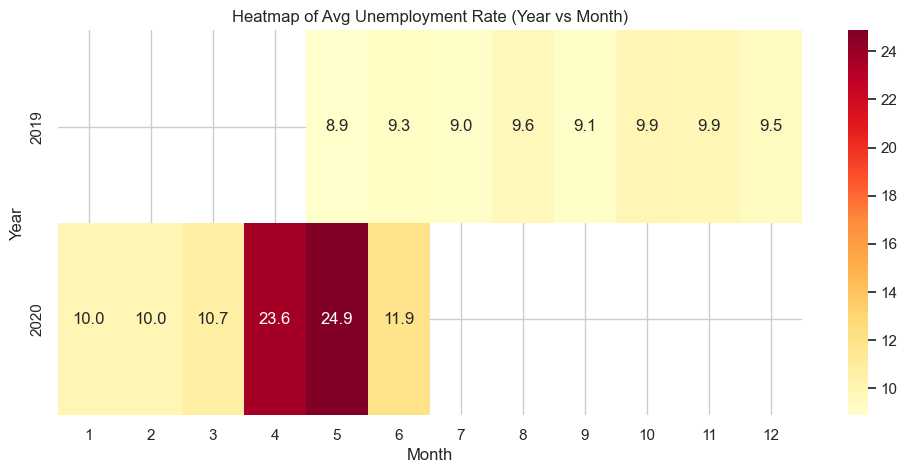

In [47]:
# Pivot table for heatmap
heatmap_data = unemployment_df.pivot_table(values='Estimated Unemployment Rate (%)', index='Year', columns='Month', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12,5))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Heatmap of Avg Unemployment Rate (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


# Mapping Insights


In [48]:
# Merge dataframes for the mapping

# Region names have no extra spaces
unemployment_df['Region'] = unemployment_df['Region'].str.strip()
coordinates_df['Region'] = coordinates_df['Region'].str.strip()

# Group original data by Region
region_avg_unemployment = unemployment_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Merge with coordinates
map_df = pd.merge(region_avg_unemployment, coordinates_df, on='Region', how='left')
map_df.head()


,Region,Estimated Unemployment Rate (%),latitude,longitude
0,Andhra Pradesh,7.477143,15.9129,79.7400
1,Assam,6.428077,26.2006,92.9376
2,Bihar,18.918214,25.0961,85.3131
3,Chandigarh,15.991667,30.7333,76.7794
4,Chhattisgarh,9.240357,21.2787,81.8661


In [66]:
fig = px.scatter_geo(
    map_df,
    lat='latitude',
    lon='longitude',
    text='Region',
    size='Estimated Unemployment Rate (%)',
    color='Estimated Unemployment Rate (%)',
    color_continuous_scale='OrRd',
    projection='natural earth',
    scope='asia',  # This is the key part
    title='Average Unemployment Rate in Indian States (2019–2020)',
    hover_name='Region',
    size_max=25,
)

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


In [72]:
# Group by Region + Date
time_df = unemployment_df.groupby(['Date', 'Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()
time_df = pd.merge(time_df, coordinates_df, on='Region', how='left')

# Plotly animated map
fig = px.scatter_geo(
    time_df,
    lat='latitude',
    lon='longitude',
    color='Estimated Unemployment Rate (%)',
    size='Estimated Unemployment Rate (%)',
    hover_name='Region',
    animation_frame='Date',
    color_continuous_scale='Greens',
    projection='natural earth',
    scope='asia',
    title='Unemployment Rate Animation (Monthly)',
    size_max=25
)

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


In [73]:
# Group by Region and calculating mean for both indicators
region_avg = unemployment_df.groupby('Region')[['Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']].mean().reset_index()

# Merge with coordinates
map_df2 = pd.merge(region_avg, coordinates_df, on='Region', how='left')

# Ploting
fig = px.scatter_geo(
    map_df2,
    lat='latitude',
    lon='longitude',
    text='Region',
    size='Estimated Unemployment Rate (%)',
    color='Estimated Labour Participation Rate (%)',  # now this column exists!
    color_continuous_scale='Blues',
    title='Unemployment (Size) vs Labour Participation (Color)',
    scope='asia',
    projection='natural earth',
    hover_name='Region',
    size_max=25,
)

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


# FINAL INSIGHTS AND RECOMMENDATIONS

After analyzing the unemployment data for 2019 and 2020 across various regions in India, the following key insights were observed:

# Key Insights:

1. Unemployment Spiked in 2020  
   - April and May 2020 showed a sudden rise in unemployment, clearly due to the nationwide Covid-19 lockdown.
   - Several regions crossed unemployment rates of 20–25% during that period.

2. Certain Regions Were More Affected  
   - States like Tripura, Haryana, and Jharkhand consistently showed higher average unemployment.
   - These regions may need special employment schemes or industrial development support.

3. Seasonal Trends Are Visible  
   - Unemployment rates tend to peak during mid-year (summer months), possibly due to reduced rural/agricultural activity.
   - Lower unemployment was seen towards the end of the year (festive/harvest seasons).

4. Mapping Insights :

   1. Average Unemployment Rate in Indian States (2019–2020)
   The first map **‘Average Unemployment Rate in Indian States (2019–2020)’** revealed that:
   - States like **Tripura, Haryana, and Bihar** consistently showed **high unemployment rates**.
   - Southern states like **Karnataka, Tamil Nadu, and Andhra Pradesh** showed relatively lower rates.

   2. Unemployment Rate Animation (Monthly)
   The animated map highlighted:
   - A **sudden spike in unemployment during early 2020**, correlating with **Covid-19 lockdowns**.
   - Some states faced **sharp monthly fluctuations**, indicating **economic instability** and dependence on informal jobs.

   3. Unemployment vs Labour Participation
   The third map presented a dual-indicator view:
   - **Larger bubbles with darker color** indicated states with **high unemployment and high labour force engagement**, suggesting **ineffective absorption of workforce**.
   - States with **low labour participation and high unemployment** may require **both skill development and employment generation programs**.

---

# Policy Recommendations:

1. Emergency Support During Crisis Months  
   - Provide job support or temporary income schemes during April–June, especially during crises like pandemics.

2. Skill Development Programs  
   - Launch region-specific skill training in high-unemployment states to improve employability.

3. Seasonal Job Schemes  
   - Plan employment programs (like MGNREGA or state job fairs) **just before peak unemployment months**, so citizens have opportunities ready.

4. Remote Work & Digital Jobs  
   - Promote remote/digital employment, especially in urban areas, to reduce impact during future lockdowns or economic disruptions.


---

### Conclusion:
This analysis highlights how data can guide decision-making. By tracking unemployment trends closely, the government and policymakers can design better, **targeted interventions** to support the economy and protect the workforce.
